# Changing Parameters

## Import Necessary Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from stardis.base import run_stardis

from astropy import units as u, constants as const

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

## How to Update Parameters

There will be instances where you may want to temporarily change or add to the yaml file you are using to make your STARDIS simulations, but don't worry, you won't need to edit the file every time. Instead, you can add the argument `add_config_dict` to `run_stardis` and temporarily set/change parts of your file this way.

For example, if your yaml file had `final_atomic_number: 30` but you wanted `final_atomic_number: 10` for just one simulation, you could run:

`sim = run_stardis('my_yaml.yml', tracing_lambdas, add_config_dict = {'model.final_atomic_number' : 10})`

note how, as `final_atomic_number` falls under `model` within the yaml file, it must be entered above as `'model.final_atomic_number'`

## Example Use

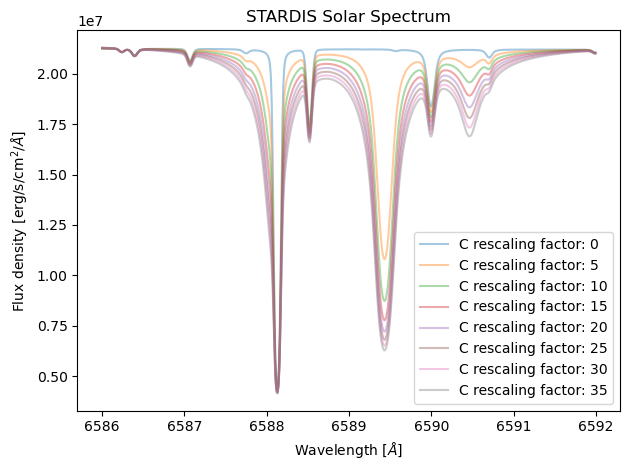

In [3]:
tracing_lambdas = np.mgrid[6586:6592:0.01]* u.Angstrom


for carbon_rescaling in range(0, 40, 5):
    sim = run_stardis('Changing_Param_Example.yml', tracing_lambdas, add_config_dict={'model.nuclide_rescaling_dict': {'C' : carbon_rescaling}})
    plt.plot(sim.lambdas, sim.spectrum_lambda, alpha = 0.4, label = f"C rescaling factor: {carbon_rescaling}")
plt.title("STARDIS Solar Spectrum")
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Flux density [erg/s/cm$^2$/$\AA$]")
plt.tight_layout()
plt.legend()

plt.show()
